In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
import numpy as np


In [ ]:
# Loading the data into a dataframe
data = pd.read_csv('/content/BrentOilPrices (1).csv')
# displaying the fist five rows of the data
data.head()

,Date,Price
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63


In [ ]:
data.dtypes

Date      object
Price    float64
dtype: object

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

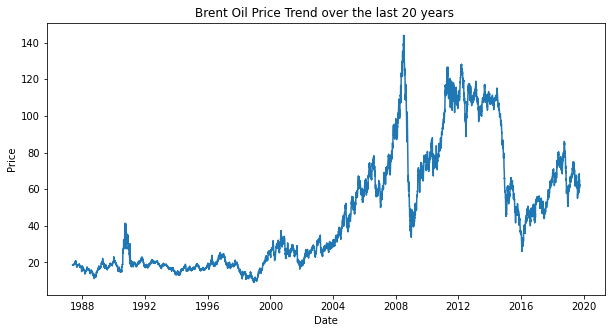

In [ ]:
# plotting a line graph for the using the date and price
plt.figure(figsize=(10,5))
plt.plot(data['Date'],data["Price"])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Brent Oil Price Trend over the last 20 years ")
plt.show()

In [ ]:
# Using rolling window feature engineering method to create the two independent variables which are moving average for 3 days and 9 days
data['MA3'] = data['Price'].rolling(window=3).mean()
data['MA9'] = data['Price'].rolling(window=9).mean()
# Displaying 5 rows and all columns of the data
data.head()

,Date,Price,MA3,MA9
0,1987-05-20,18.63,NaN,NaN
1,1987-05-21,18.45,NaN,NaN
2,1987-05-22,18.55,18.543333,NaN
3,1987-05-25,18.60,18.533333,NaN
4,1987-05-26,18.63,18.593333,NaN


In [ ]:
# Dropping missing values
data = data.dropna()

In [ ]:
# checking whether missing values have been dropped
data.head()

,Date,Price,MA3,MA9
8,1987-06-01,18.65,18.610000,18.587778
9,1987-06-02,18.68,18.636667,18.593333
10,1987-06-03,18.75,18.693333,18.626667
11,1987-06-04,18.78,18.736667,18.652222
12,1987-06-05,18.65,18.726667,18.657778


In [ ]:
data= data.set_index('Date')

In [ ]:
data.head()

,Price,MA3,MA9
Date,,,
1987-06-01,18.65,18.610000,18.587778
1987-06-02,18.68,18.636667,18.593333
1987-06-03,18.75,18.693333,18.626667
1987-06-04,18.78,18.736667,18.652222
1987-06-05,18.65,18.726667,18.657778


In [ ]:
# Define the Train and Test Data
X = data[['MA3', 'MA9']]
y = data['Price']

In [ ]:
#  Splitting the data in Train and Test data sets
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size = 0.2)

In [ ]:
# Instantiating the Regression Model
model = LinearRegression()

In [ ]:
# Fitting the Model on Train Set
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Making predictions with with regression model on the train data set
y_pred_train = model.predict(X_train)
data.head()

,Price,MA3,MA9
Date,,,
1987-06-01,18.65,18.610000,18.587778
1987-06-02,18.68,18.636667,18.593333
1987-06-03,18.75,18.693333,18.626667
1987-06-04,18.78,18.736667,18.652222
1987-06-05,18.65,18.726667,18.657778


In [ ]:
# Evaluating the performance of the regression model on the train data set
import sklearn.metrics as sm
r2_train = sm.r2_score(y_train, y_pred_train)
mse_train = sm.mean_squared_error(y_train, y_pred_train)

In [ ]:
#Performance on train data set
print("r2_score:", r2_train)
print("mse:", mse_train)

r2_score: 0.9994551168004602
mse: 0.5803044514228923


In [ ]:
# Making Predictions on Test Set
y_pred_test = model.predict(X_test)

In [ ]:
# Creating data frame for the predictions made and the actual values
data = pd.DataFrame(data={'predictions': y_pred_test, 'actual': y_test},index=y_test.index)
data.head()

,predictions,actual
Date,,
2008-02-29,99.978471,100.90
2018-11-08,69.447554,69.29
2008-04-21,111.463988,111.35
1990-07-24,18.808847,19.08
2015-07-07,56.477477,54.72


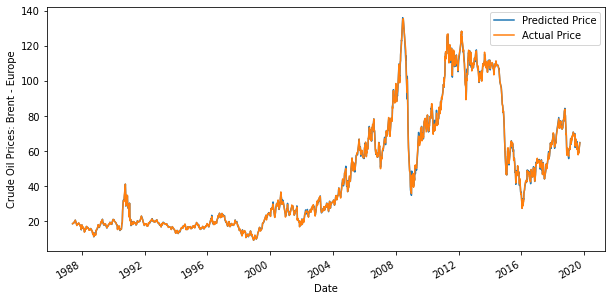

In [ ]:
#Visualizing the Actua Price and the Predicted Price
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices: Brent - Europe")
plt.show()

In [ ]:
#Evaluating the performance of the regression model on the test data set
r2_test = sm.r2_score(y_test, y_pred_test)
mse_test = sm.mean_squared_error(y_test, y_pred_test)

In [ ]:
#Performance on test data set
print("r2_score:", r2_test)
print("mse:", mse_test)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_test), 1))

r2_score: 0.9994595411972406
mse: 0.5877308967293488
Mean absolute error = 0.5


In [ ]:
# Estimating the values of the slope and intercept
slope = model.coef_
y_intercept = model.intercept_

In [ ]:
#Printing the regression model
print("slope:",slope)
print("y_intercept:",y_intercept)

slope: [ 1.21891812 -0.21919833]
y_intercept: 0.018806700255353803


In [ ]:
#Using Durbin-Watson test to test for Autocorrelation in the Brent Oil Prices


LSTM NEURAL NETWORKS

In [ ]:
# reading the data into a dataframe
data= pd.read_csv('/content/BrentOilPrices (1).csv')
# displaying the fist five rows of the data
data.head()

,Date,Price
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
#Indexing the date
data= data.set_index('Date')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(data)


In [ ]:
# split into train and test sets
train_size = int(len(df) * 0.67)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]
print(len(train), len(test))

5504 2712


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(df, look_back=1):
	dataX, dataY = [], []
	for i in range(len(df)-look_back-1):
		a = df[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(df[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [ ]:
# Creating a look-back in the form of  X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [ ]:
trainX, trainY

(array([[0.07067112],
        [0.0693363 ],
        [0.07007786],
        ...,
        [0.25094549],
        [0.27245087],
        [0.29506859]]),
 array([0.0693363 , 0.07007786, 0.07044865, ..., 0.27245087, 0.29506859,
        0.27534297]))

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [ ]:
import math

from keras.models import Sequential

from keras.layers import Dense

from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

In [ ]:
#create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
5502/5502 - 10s - loss: 0.0044 - 10s/epoch - 2ms/step
Epoch 2/100
5502/5502 - 8s - loss: 6.2817e-05 - 8s/epoch - 1ms/step
Epoch 3/100
5502/5502 - 8s - loss: 6.1662e-05 - 8s/epoch - 1ms/step
Epoch 4/100
5502/5502 - 8s - loss: 6.3205e-05 - 8s/epoch - 1ms/step
Epoch 5/100
5502/5502 - 8s - loss: 6.1498e-05 - 8s/epoch - 1ms/step
Epoch 6/100
5502/5502 - 8s - loss: 6.1169e-05 - 8s/epoch - 1ms/step
Epoch 7/100
5502/5502 - 8s - loss: 6.0675e-05 - 8s/epoch - 1ms/step
Epoch 8/100
5502/5502 - 8s - loss: 6.2444e-05 - 8s/epoch - 1ms/step
Epoch 9/100
5502/5502 - 8s - loss: 6.0305e-05 - 8s/epoch - 1ms/step
Epoch 10/100
5502/5502 - 8s - loss: 6.1626e-05 - 8s/epoch - 1ms/step
Epoch 11/100
5502/5502 - 8s - loss: 6.0374e-05 - 8s/epoch - 1ms/step
Epoch 12/100
5502/5502 - 8s - loss: 6.0835e-05 - 8s/epoch - 1ms/step
Epoch 13/100
5502/5502 - 8s - loss: 6.1487e-05 - 8s/epoch - 1ms/step
Epoch 14/100
5502/5502 - 8s - loss: 6.1341e-05 - 8s/epoch - 1ms/step
Epoch 15/100
5502/5502 - 8s - loss: 5.9827e-0

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


85/85 [==============================] - 0s 2ms/step
Train Score: 1.01 RMSE
Test Score: 1.42 RMSE


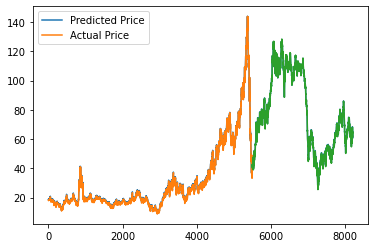

In [ ]:
# shift train predictions for plotting
trainPredictPlot= np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Predicted Price','Actual Price'])
plt.show()
